<a href="https://colab.research.google.com/github/NathanaelMutua/British-Airways-Data-Science-Challenge/blob/master/Task%202%20British%20Airways%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **British Airways Data Science Challenge**
# **Task 2**

## **Summary:**
### **1.Explore and Prepare the Dataset:**

Use the provided Jupyter Notebook to understand the dataset’s columns and statistics.
Clean and engineer new features that may improve predictive performance.

### **2.Train a Machine Learning Model:**

Build a predictive model to determine if a customer will make a booking.
Use an algorithm (e.g., Random Forest) that provides insights into the importance of each feature.

### **3.Evaluate and Present Findings:**

Assess model performance with cross-validation.
Report relevant metrics to demonstrate how well the model predicts bookings.

# **Data Exploration**
Involves examining a dataset’s structure, patterns, and basic statistics to understand its variables, spot any anomalies or missing values, and uncover potential relationships.
This process often includes summary statistics, visualizations, and initial feature assessments to guide subsequent data cleaning and modeling decisions.

In [154]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns

## **Loading Data into The Data Frame**

To load data into a Pandas DataFrame from Google Drive, I first mount my Drive in Google Colab using from google.colab import drive and drive.mount('/content/drive').

Then, I locate the file path and use pd.read_csv() or pd.read_excel() to read the data into a DataFrame, making it ready for analysis.

In [155]:
# Let's first load our data into a dataframe(bookings)
from google.colab import drive

# I saved my file in my drive, so I will draw the file from my Drive
drive.mount('/content/drive')
csv_file = '/content/drive/My Drive/BRITISH AIRWAYS VIRTUAL INTERNSHIP/customer_booking.csv'
bookings = pd.read_csv(csv_file, encoding = "ISO-8859-1")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Shape of the dataframe**
Understanding the shape of a DataFrame is crucial for assessing the size and structure of the dataset.

By using .shape, I can quickly determine the number of rows and columns, which helps me gauge the dataset’s complexity, check for missing data, and ensure it aligns with my expectations before performing further analysis.

In [156]:
# Let's see the shape(rows and columns; rows,columns) in our dataframe
bookings.shape

(50000, 14)

In [157]:
# Let's see the 14 columns in our dataset.
for col in bookings.columns:
    print(col) # Let's us loop through the columns

num_passengers
sales_channel
trip_type
purchase_lead
length_of_stay
flight_hour
flight_day
route
booking_origin
wants_extra_baggage
wants_preferred_seat
wants_in_flight_meals
flight_duration
booking_complete


In [158]:
# Let's check the datatypes for each column
bookings.dtypes

,0
num_passengers,int64
sales_channel,object
trip_type,object
purchase_lead,int64
length_of_stay,int64
flight_hour,int64
flight_day,object
route,object
booking_origin,object
wants_extra_baggage,int64


In [159]:
# .info() gives us a detailed brakdown, showing us the column name, null count and datatype of the column.
print(bookings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [160]:
# Let's see what the columns contain
bookings.head(6)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0


In [161]:
# Let's see the outcomes for the bookings
bookings.booking_complete.value_counts()

,count
booking_complete,
0,42522
1,7478


## **Random Data Visualization**

Visualizing random data helps uncover hidden patterns, trends, and distributions that might not be obvious in raw numbers.

By using charts like histograms, scatter plots, or box plots, I can quickly identify anomalies, correlations, and overall data behavior, making it easier to draw meaningful insights and guide further analysis.

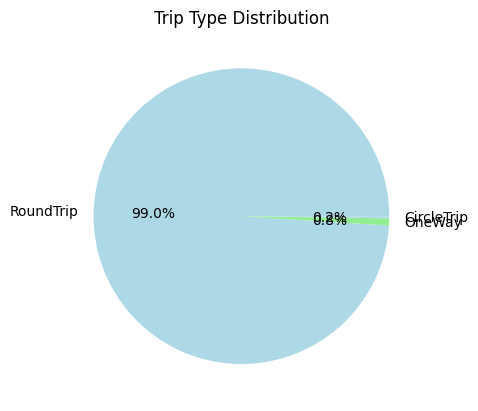

In [162]:
# Just for a brief preview let's visualize our trip type data
import matplotlib.pyplot as plt

bookings["trip_type"].value_counts().plot.pie(autopct='%1.1f%%', colors=["lightblue", "lightgreen"])
plt.title("Trip Type Distribution")
plt.ylabel("")
plt.show()

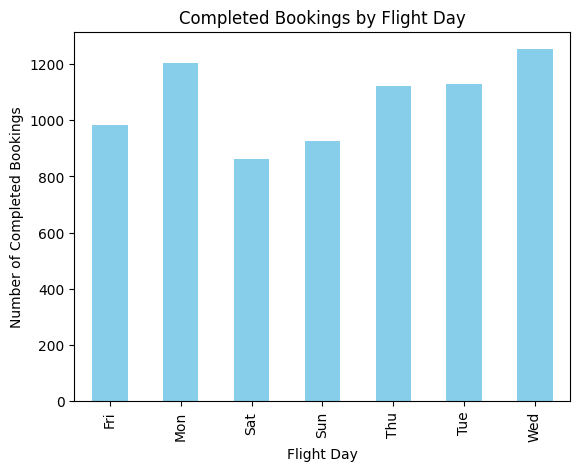

In [163]:
# Brief visualization of our complete bookings on different days of the week
booking_counts = bookings.groupby('flight_day')['booking_complete'].sum()

booking_counts.plot(kind='bar', color='skyblue')
plt.title('Completed Bookings by Flight Day')
plt.xlabel('Flight Day')
plt.ylabel('Number of Completed Bookings')
plt.show()

# **Data Preperation**
Feature importance helps identify which variables have the most impact on a predictive model's outcome. By analyzing feature importance, I can focus on the most relevant data, improve model accuracy, reduce complexity, and eliminate irrelevant or redundant features.

This step is crucial in data preparation, ensuring that the model learns from meaningful patterns rather than noise.

Encoding data before modeling is essential for converting categorical variables into numerical formats that machine learning algorithms can understand.

Techniques like one-hot encoding, label encoding, and ordinal encoding help represent categorical data efficiently. Proper encoding ensures that the model correctly interprets categorical relationships, avoids introducing bias, and improves overall prediction accuracy.


## **Feature Importance using MI(Mutual Intelligence) Score**

Feature Importance using the Mutual Information (MI) Score helps determine how much information a feature provides about the target variable.

By grouping data using groupby() and calculating entropy, I can measure how well each feature reduces uncertainty in predictions.

Features with higher MI scores contribute more to the model’s predictive power, making them valuable for selection.

This technique ensures that the model focuses on the most informative features while reducing noise and redundancy.

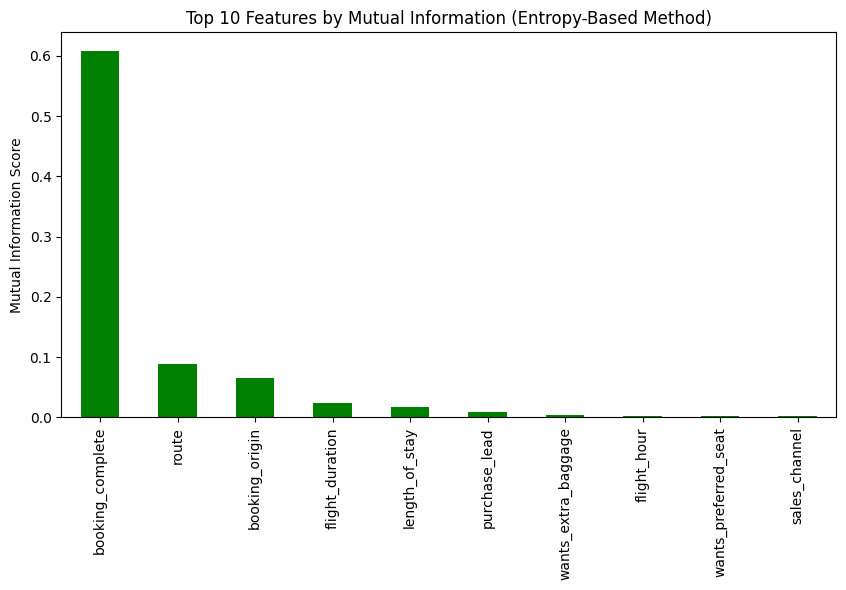

In [182]:
from scipy.stats import entropy

# Compute entropy of target variable
target_entropy = entropy(y.value_counts(normalize=True), base=2)

# Compute conditional entropy of each feature
mi_scores = {}
for col in bookings.columns:
    feature_entropy = entropy(bookings[col].value_counts(normalize=True), base=2)
    joint_entropy = entropy(pd.crosstab(bookings[col], y, normalize=True).values.flatten(), base=2)
    mi_scores[col] = target_entropy + feature_entropy - joint_entropy

# Convert to Pandas Series and sort
mi_scores = pd.Series(mi_scores).sort_values(ascending=False)

# Plot top 10 features
mi_scores[:10].plot(kind="bar", figsize=(10, 5), color="green")
plt.title("Top 10 Features by Mutual Information (Entropy-Based Method)")
plt.ylabel("Mutual Information Score")
plt.show()


In [165]:
# Removing Irrelevant data
# Set MI threshold (e.g., keep only features with MI score > 0.01)
threshold = 0.01
selected_features_mi = mi_scores[mi_scores > threshold].index.tolist()

print(f"Selected {len(selected_features_mi)} features using MI.")

Selected 5 features using MI.


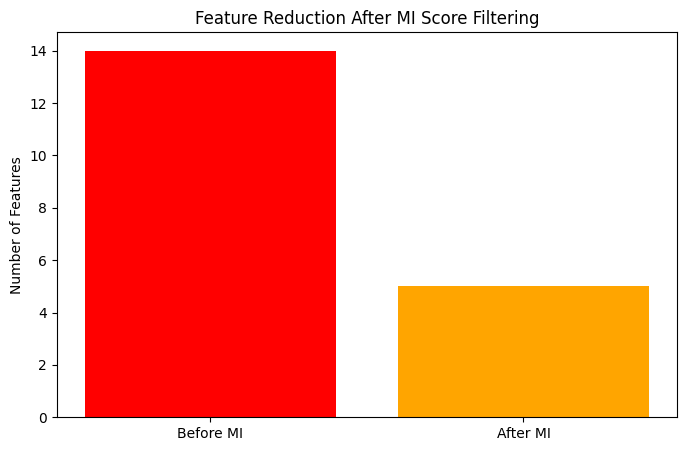

In [166]:
import matplotlib.pyplot as plt

# Count features before and after MI filtering
num_original_features = len(bookings.columns)
num_mi_selected_features = len(selected_features_mi)

# Plot comparison
plt.figure(figsize=(8, 5))
plt.bar(["Before MI", "After MI"], [num_original_features, num_mi_selected_features], color=["red", "orange"])
plt.ylabel("Number of Features")
plt.title("Feature Reduction After MI Score Filtering")
plt.show()


## **Correlation Matrix**

Correlation analysis helps identify redundant features by measuring the relationship between variables. Highly correlated features provide similar information, which can lead to overfitting and unnecessary complexity in a model.

Removing or combining redundant features enhances model performance, reduces complexity, and prevents overfitting, ensuring the model learns from distinct, informative patterns without unnecessary duplication.


Values range from -1 to 1:

1.0 - Perfect positive correlation

-1.0 - Perfect negative correlation

0 - No correlation

In [180]:
import seaborn as sns

# Compute correlation matrix
corr_matrix = bookings.select_dtypes(include=["int64", "float64"]).corr()

# Display correlation matrix
print(corr_matrix)

                       num_passengers  purchase_lead  length_of_stay  \
num_passengers               1.000000       0.212606       -0.115850   
purchase_lead                0.212606       1.000000       -0.076560   
length_of_stay              -0.115850      -0.076560        1.000000   
flight_hour                  0.015607       0.035973       -0.024872   
wants_extra_baggage          0.120404      -0.022207        0.176757   
wants_preferred_seat         0.028544      -0.004499        0.032264   
wants_in_flight_meals        0.022943      -0.022653        0.098828   
flight_duration             -0.063169       0.067866        0.141181   
booking_complete             0.024116      -0.022131       -0.042408   

                       flight_hour  wants_extra_baggage  wants_preferred_seat  \
num_passengers            0.015607             0.120404              0.028544   
purchase_lead             0.035973            -0.022207             -0.004499   
length_of_stay           -0.024872  

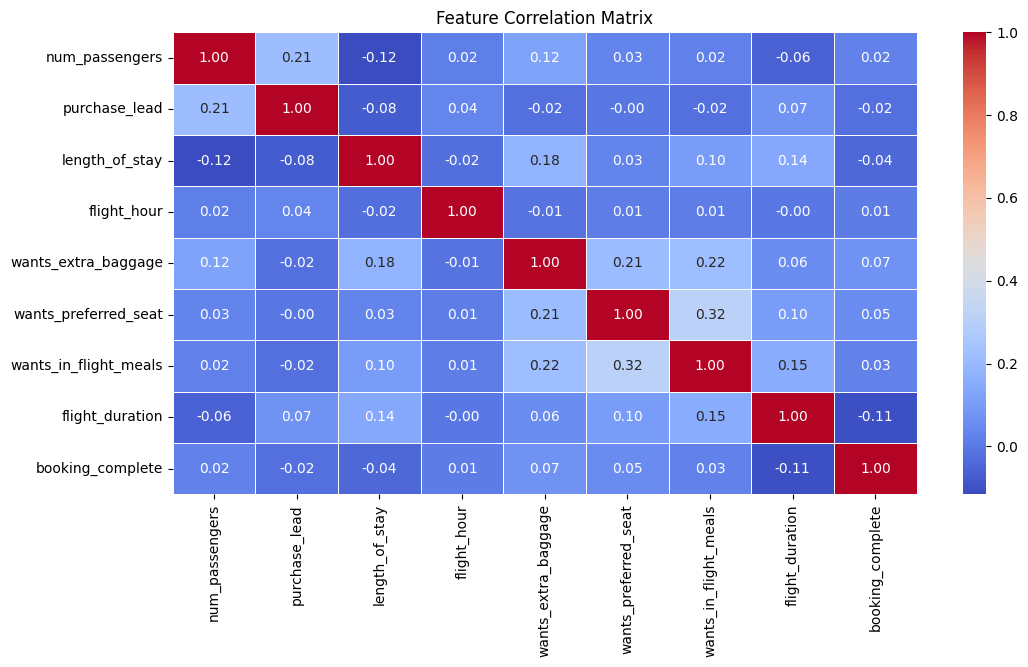

In [181]:
# Visualising correlation with a heatmap

# Red = High correlation
# Blue = Low correlation
# Helps visually detect highly correlated features

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [169]:
# Here we will identify features with high correlation
# Let's set correlation threshold (e.g., 0.7)
corr_threshold = 0.7

# Then we find highly correlated features
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > corr_threshold:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

# Then remove highly correlated features
selected_features_final = [col for col in selected_features_mi if col not in high_corr_features]

print(f"Final selected {len(selected_features_final)} features after removing high correlation.")

Final selected 5 features after removing high correlation.


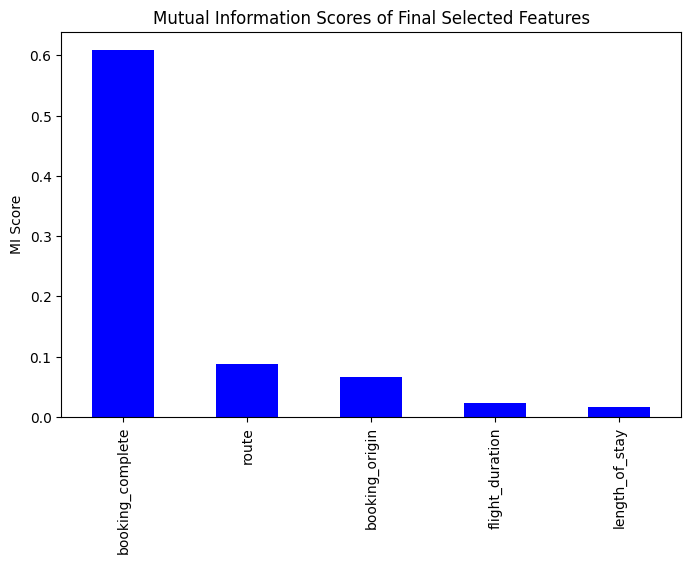

In [170]:
# Here's a ranked bar plot to compare MI scores of the final features
plt.figure(figsize=(8, 5))
mi_scores[selected_features_final].plot(kind="bar", color="blue")
plt.title("Mutual Information Scores of Final Selected Features")
plt.ylabel("MI Score")
plt.show()

In [171]:
# let's make our feature selected a datframe to make the encoding process more efficient
df_selected = bookings[selected_features_final]

## **Encoding Data**
Encoding data in a DataFrame involves transforming categorical variables into numerical representations so they can be used in machine learning models.

Common techniques include one-hot encoding (creating binary columns for each category), label encoding (assigning numerical values to categories), and ordinal encoding (preserving order in ranked data).

Proper encoding ensures the model can process categorical features effectively, **improving prediction accuracy while maintaining data integrity**.

In [172]:
# Let's turn Categorical data to numerical form, in preperation for data modelling
categorical_cols = df_selected.select_dtypes(include=["object"]).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['route', 'booking_origin'], dtype='object')


In [173]:
from sklearn.preprocessing import LabelEncoder

# Since all our categorical data is nominal data we can go ahead and encode them as nominal data using Hot-one encoding
df_selected = pd.get_dummies(df_selected, columns = categorical_cols, drop_first = True)

In [174]:
# Let's see the outcome of our encoding:
df_selected.head()
print(df_selected.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 904 entries, booking_complete to booking_origin_Vietnam
dtypes: bool(901), float64(1), int64(2)
memory usage: 44.1 MB
None


# **Modelling**

Modeling involves training a machine learning algorithm on prepared data to make predictions or uncover patterns. Random Forest is a powerful ensemble learning method that combines multiple decision trees to improve accuracy and reduce overfitting.

It works by randomly selecting subsets of data and features to build diverse trees, then averaging their outputs for classification or regression tasks.

This technique enhances model robustness, handles missing data well, and provides valuable insights through feature importance analysis.


## **Random Forest Algorithm**
Random Forest is an ensemble learning algorithm in machine learning that builds multiple decision trees and combines their outputs to improve accuracy and stability.

It works by randomly selecting subsets of data and features for each tree, reducing overfitting and enhancing generalization.

Random Forest is widely used for classification and regression tasks due to its ability to handle large datasets, manage missing values, and provide feature importance insights, making it a versatile and powerful model.

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Ensure X only contains the 4 selected features
selected_features = ["route", "booking_origin", "flight_duration", "length_of_day"]
X = df_selected[[col for col in df_selected.columns if col!= "booking_complete"]] # Here we've selected all columns apart from the target
y = df_selected["booking_complete"]  # This is the variable we are targetting

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
# Step 2: Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [177]:
# Step 3: Evaluate Model
y_pred = model.predict(X_test)

print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.8331

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      8520
           1       0.36      0.16      0.22      1480

    accuracy                           0.83     10000
   macro avg       0.61      0.56      0.56     10000
weighted avg       0.79      0.83      0.81     10000



In [178]:
# Extract feature importances
feature_importances = model.feature_importances_
feature_names = [col for col in df_selected.columns if col != "booking_complete"]


<ipython-input-179-ea1f0d76ffe2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df_top["Importance"], y=importance_df_top["Feature"], palette="Oranges_r")


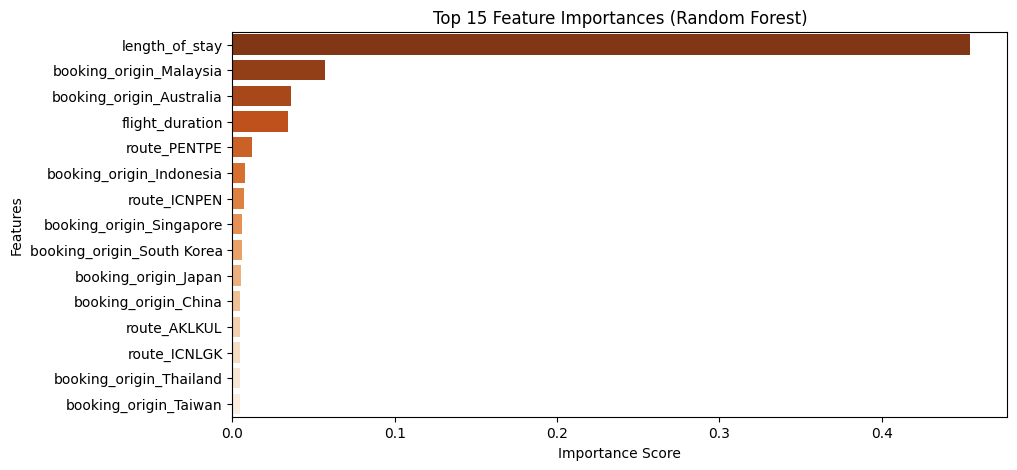

In [179]:
# Convert to a Pandas DataFrame for easier sorting
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Select top 15 most important features to prevent clutter on the plot(total of 904 columns)
top_n = 15
importance_df_top = importance_df.head(top_n)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df_top["Importance"], y=importance_df_top["Feature"], palette="Oranges_r")
plt.title(f"Top {top_n} Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()